# PushShift Reddit Web Scraping

In [179]:
import numpy as np
import requests
import pandas as pd
import time
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

pd.options.display.max_colwidth = 400
%config InlineBackend.figure_format = 'retina'

## Fetch 50000 posts from Uplifting News with score >= 10 and comments >= 10

In [52]:

url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 500
subreddit = 'UpliftingNews'
start_time = time.time()

params = {
    'subreddit': subreddit,
    'size': 100,
    'score': '>9',
    'num_comments' : '>9',
    'before': round(start_time)
    }

for i in range(loops):
    current_time = time.time()
    
    #requesting data
    res = requests.get(url, params)
    print(f'res {i+1} code: ', res.status_code)
    
    if res.status_code != 200:
        pass
    else:
        data = res.json()
        posts = data['data']
        post_df = pd.DataFrame(posts)
        dfs.append(post_df)
        #get oldest post time and use as before parameter in next request
        oldest = post_df['created_utc'].min()
        params['before'] = oldest

    time.sleep(1)
    
upliftingnews = pd.concat(dfs)

res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  200
res 10 code:  502
res 11 code:  200
res 12 code:  200
res 13 code:  200
res 14 code:  200
res 15 code:  200
res 16 code:  200
res 17 code:  200
res 18 code:  200
res 19 code:  502
res 20 code:  502
res 21 code:  200
res 22 code:  200
res 23 code:  200
res 24 code:  200
res 25 code:  200
res 26 code:  200
res 27 code:  200
res 28 code:  200
res 29 code:  200
res 30 code:  200
res 31 code:  200
res 32 code:  200
res 33 code:  200
res 34 code:  200
res 35 code:  200
res 36 code:  200
res 37 code:  200
res 38 code:  200
res 39 code:  200
res 40 code:  200
res 41 code:  200
res 42 code:  200
res 43 code:  200
res 44 code:  200
res 45 code:  200
res 46 code:  200
res 47 code:  502
res 48 code:  200
res 49 code:  200
res 50 code:  200
res 51 code:  200
res 52 code:  200
res 53 code:  200
res 54 code:  200
res 55 code:  200
res 56 code:  200
r

KeyError: 'created_utc'

**Convert epoch to datetime**

In [54]:
upliftingnews = pd.concat(dfs)
upliftingnews['created_utc'].min()

1337736782

**send the raw file to CSV** 

In [56]:
upliftingnews.to_csv('upliftingnews.csv', index=False)

In [57]:
upliftingnews.shape

(10841, 94)

## Fetch 50000 posts from NottheOnion with score >= 10 and comments >= 10

In [37]:
url = 'https://api.pushshift.io/reddit/submission/search'
dfs = []
loops = 500
subreddit = 'nottheonion'
start_time = time.time()

params = {
    'subreddit': subreddit,
    'size': 100,
    'score': '>9',
    'num_comments': '>9',
    'before': round(start_time)
}

for i in range(loops):
    current_time = time.time()

    #requesting data
    res = requests.get(url, params)
    print(f'res {i+1} code: ', res.status_code)

    if res.status_code != 200:
        pass
    else:
        data = res.json()
        posts = data['data']
        post_df = pd.DataFrame(posts)
        dfs.append(post_df)
        #get oldest post time and use as before parameter in next request
        oldest = post_df['created_utc'].min()
        params['before'] = oldest

    time.sleep(1)

nottheonion1 = pd.concat(dfs)

res 1 code:  200
res 2 code:  200
res 3 code:  200
res 4 code:  200
res 5 code:  200
res 6 code:  200
res 7 code:  200
res 8 code:  200
res 9 code:  502
res 10 code:  200
res 11 code:  200
res 12 code:  200
res 13 code:  200
res 14 code:  200
res 15 code:  200
res 16 code:  200
res 17 code:  200
res 18 code:  200
res 19 code:  200
res 20 code:  200
res 21 code:  200
res 22 code:  200
res 23 code:  200
res 24 code:  200
res 25 code:  200
res 26 code:  200
res 27 code:  200
res 28 code:  200
res 29 code:  200
res 30 code:  200
res 31 code:  200
res 32 code:  200
res 33 code:  200
res 34 code:  200
res 35 code:  200
res 36 code:  200
res 37 code:  200
res 38 code:  200
res 39 code:  200
res 40 code:  200
res 41 code:  200
res 42 code:  200
res 43 code:  200
res 44 code:  200
res 45 code:  200
res 46 code:  200
res 47 code:  200
res 48 code:  200
res 49 code:  200
res 50 code:  200
res 51 code:  200
res 52 code:  200
res 53 code:  200
res 54 code:  200
res 55 code:  200
res 56 code:  200
r

KeyError: 'created_utc'

**Convert epoch to datetime**

In [46]:

nottheonion1['created_utc'].min()

1331490414

**send the raw file to CSV** 

In [55]:
nottheonion1.to_csv('nottheonion.csv', index=False)

# EDA

In [180]:
nottheonion = pd.read_csv('nottheonion.csv')

/Users/alyssiaoh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,3,4,5,6,8,9,10,11,12,14,15,18,20,21,22,23,24,26,27,28,29,30,31,32,33,37,39,40,41,46,47,48,52,58,61,62,65,66,68,70,71,74,76,78,79,80,81,82,85,88,89,90,92,93,94,95,100,101) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [181]:
nottheonion1.shape

(33323, 102)

In [182]:
nottheonion.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium',
       ...
       'subreddit_name_prefixed', 'suggested_sort', 'brand_safe',
       'previous_visits', 'edited', 'approved_at_utc', 'banned_at_utc',
       'view_count', 'mod_reports', 'user_reports'],
      dtype='object', length=102)

In [183]:
nottheonion['datetime'] = pd.to_datetime(nottheonion['created_utc'], unit='s')

In [186]:

nottheonion.drop_duplicates(keep=False, inplace=True)

In [187]:
nottheonion.shape

(33323, 103)

In [172]:
nottheonion_df = nottheonion[['datetime', 'title', 'score', 'num_comments']]

In [58]:
uplifting = pd.read_csv('upliftingnews.csv')

/Users/alyssiaoh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,4,6,8,9,10,11,12,16,18,19,20,21,22,24,26,27,28,29,30,31,35,37,44,45,46,50,56,59,60,62,63,64,66,68,69,72,73,75,76,79,80,81,82,85,92,93) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [126]:
uplifting_df = uplifting[['datetime', 'title', 'score', 'num_comments']]

In [127]:
uplifting_df.head()

,datetime,title,score,num_comments
0,2020-12-19 18:01:37,Anthony Fauci reassures small children with claim to have vaccinated Santa,10,11
1,2020-12-19 17:16:47,Anthony Fauci reassures small children with claim to have vaccinated Santa | US news,13,28
2,2020-12-19 09:33:05,"Mongolia will pay for electricity, water, heat and garbage collection for all Of Its citizens For Seven Months To Help With COVID-19 Recovery",109,1194
3,2020-12-19 07:29:26,Small-business advocate releases free browser plugin that provides local alternatives to products on Amazon &amp; other corporate sites,63,13
4,2020-12-19 03:07:28,The Moderna Covid-19 vaccine has been given authorisation for use in the US by the country’s Food and Drug Administration (FDA).,55,13


In [141]:
uplifting.drop_duplicates(keep=False, inplace=True)

In [153]:
uplifting['datetime'] = pd.to_datetime(uplifting['created_utc'], unit='s')

In [128]:
nottheonion_df.describe()

,score,num_comments
count,33323.000000,33323.000000
mean,1605.733847,174.987636
std,5965.549152,524.113909
min,10.000000,10.000000
25%,50.000000,15.000000
50%,130.000000,27.000000
75%,498.000000,81.000000
max,118958.000000,11664.000000


In [129]:
uplifting_df.describe()

,score,num_comments
count,10841.000000,10841.000000
mean,4255.518679,212.943363
std,9500.215832,423.031163
min,10.000000,10.000000
25%,130.000000,17.000000
50%,507.000000,40.000000
75%,3121.000000,210.000000
max,124278.000000,6022.000000


In [131]:
uplifting_df.describe()

,score,num_comments
count,10841.000000,10841.000000
mean,4255.518679,212.943363
std,9500.215832,423.031163
min,10.000000,10.000000
25%,130.000000,17.000000
50%,507.000000,40.000000
75%,3121.000000,210.000000
max,124278.000000,6022.000000


(0.0, 1000.0)

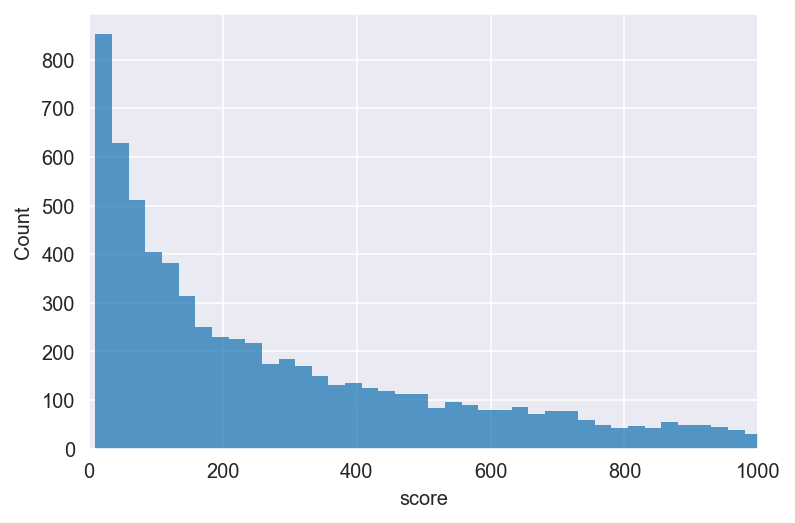

In [132]:
sns.histplot(uplifting_df['score'], bins=5000)
plt.xlim(0, 1000)

(0.0, 1000.0)

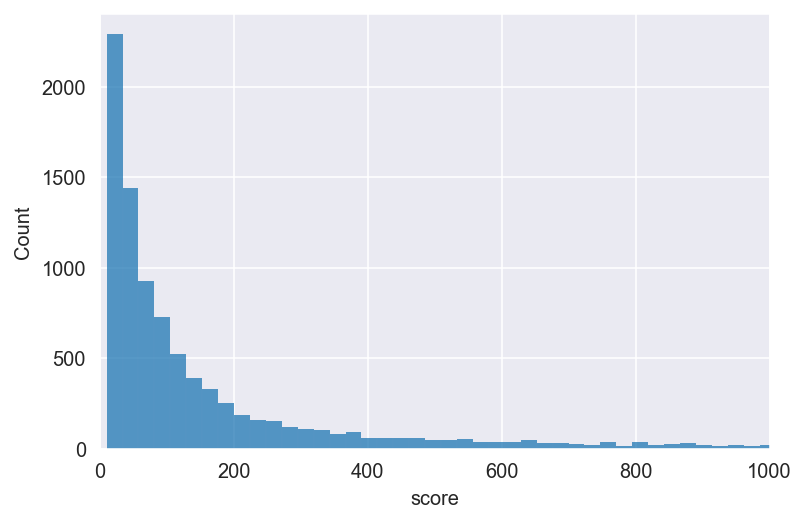

In [135]:
sns.histplot(nottheonion_df['score'], bins=5000)
plt.xlim(0, 1000)

In [176]:
nottheonion_df['title'].nunique()

10084

In [175]:
nottheonion_df = nottheonion_df.loc[0:10736]

In [142]:
uplifting_df['title'].nunique()

10736

In [140]:
uplifting_df.drop_duplicates(keep=False, inplace=True)

<ipython-input-140-573d9b82c87c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uplifting_df.drop_duplicates(keep=False, inplace=True)


In [74]:
# 5 longest posts
datasets_df['selftext'].map(lambda x: len(x)).nlargest()

93    147
26    146
71    124
43    123
68     49
Name: selftext, dtype: int64

In [75]:
datasets_df['selftext'].map(lambda x: len(x)).mean()

10.66

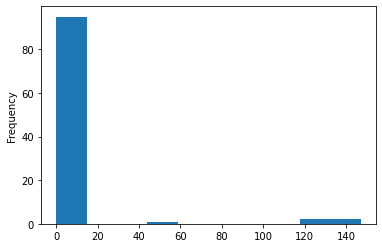

In [76]:
# distribution of post length
datasets_df['selftext'].map(lambda x: len(x)).plot(kind='hist');

In [111]:
uplifting_df.drop_duplicates(subset=['title'], keep=False)

,created_utc,title,score,num_comments,datetime
0,1608400897,Anthony Fauci reassures small children with claim to have vaccinated Santa,10,11,2020-12-19 18:01:37
1,1608398207,Anthony Fauci reassures small children with claim to have vaccinated Santa | US news,13,28,2020-12-19 17:16:47
2,1608370385,"Mongolia will pay for electricity, water, heat and garbage collection for all Of Its citizens For Seven Months To Help With COVID-19 Recovery",109,1194,2020-12-19 09:33:05
3,1608362966,Small-business advocate releases free browser plugin that provides local alternatives to products on Amazon &amp; other corporate sites,63,13,2020-12-19 07:29:26
4,1608347248,The Moderna Covid-19 vaccine has been given authorisation for use in the US by the country’s Food and Drug Administration (FDA).,55,13,2020-12-19 03:07:28
...,...,...,...,...,...
10836,1338851558,STATE OF THE SUBREDDIT ADDRESS:,527,41,2012-06-04 23:12:38
10837,1338649596,"After 13 years of determination, Dusty, born with Down Syndrome, earns a black belt in Kung Fu.",124,13,2012-06-02 15:06:36
10838,1338037021,Special Education Student Becomes Prom King,44,10,2012-05-26 12:57:01
10839,1337871598,Uplifting indeed. Many thanks to this awesome little sub,59,14,2012-05-24 14:59:58


In [177]:
uplifting_df['title'].nunique()

10736

In [178]:
nottheonion_df.drop_duplicates(subset=['title'], keep=False)

,datetime,title,score,num_comments
0,2020-12-19 16:35:09,Russia trying to send an actress into space before Tom Cruise,10,10
1,2020-12-19 15:29:24,Canadian man fined for loudly singing Everybody Dance Now,11,23
2,2020-12-19 14:35:00,Michigan parents must pay after destroying son's $25K porn stash,10,19
3,2020-12-19 14:05:02,Brazilian President Jair Bolsonaro: COVID-19 Vaccine Can Turn People Into Crocodiles,10,46
4,2020-12-19 13:32:02,Rubber ducks become a symbol of pro democracy protests in Thailand after being used as protection from teargas and water canons,48,71
...,...,...,...,...
10732,2018-01-10 21:43:03,Diet Coke’s new cans and flavors are Millennial-friendly,23,13
10733,2018-01-10 16:50:54,Scathing 'ruling' issued against Miami reporter with too many items in the express checkout,65,14
10734,2018-01-10 15:16:42,"Over half of Heathrow's near 79,000 noise complaints last year came from 10 people",373,45
10735,2018-01-10 15:00:24,Charlie Daniels warns Taco Bell: 'The illuminati is not a frivolous subject',28666,1487


In [89]:
nottheonion_df['title'].nunique()

32204